<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_11503_virtual_friends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

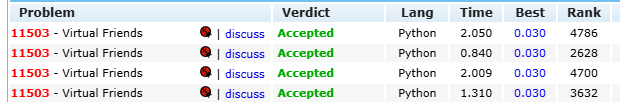

**@PDF: [UVA 11503 - Virtual Friends](https://onlinejudge.org/external/115/11503.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

# UVA 11503 Virtual Friends

These days, you can do all sorts of things online. For example, you can use various websites to make virtual friends. For some people, growing their social network (their friends, their friends' friends, their friends' friends' friends, and so on), has become an addictive hobby. Just as some people collect stamps, other people collect virtual friends.

Your task is to observe the interactions on such a website and keep track of the size of each person's network.

Assume that every friendship is mutual. If Fred is Barney's friend, then Barney is also Fred's friend.

## Input

The first line of input contains one integer specifying the number of test cases to follow. Each test case begins with a line containing an integer F, the number of friendships formed, which is no more than 100 000. Each of the following F lines contains the names of two people who have just become friends, separated by a space. A name is a string of 1 to 20 letters (uppercase or lowercase).

## Output

Whenever a friendship is formed, print a line containing one integer, the number of people in the social network of the two people who have just become friends.

## Sample Input

1\
3\
Fred Barney\
Barney Betty\
Betty Wilma


## Sample Output

2\
3\
4

In [ ]:
# Import necessary modules
from time import time       # To measure execution time (optional)
from sys import stdin, stdout # For potentially faster input/output

# --- Dictionary-based Union-Find (Disjoint Set Union) Class ---
# This implementation uses dictionaries, allowing element IDs (keys)
# to be arbitrary hashable objects (like strings), not just contiguous integers.
class UFD:
  def __init__(self):
    """Initializes empty dictionaries to store the Union-Find structure."""
    # _id: Stores the parent of each element. Key: element, Value: parent element
    self._id = {}
    # _count: Stores the size (number of elements) in the set represented by the root. Key: root element, Value: count
    self._count = {}
    # _rank: Stores the rank (an upper bound on tree height) for union-by-rank optimization. Key: root element, Value: rank
    self._rank = {}

  def find(self, p):
    """
    Finds the representative (root) of the set containing element p.
    Implements path compression. Adds p to the structure if not seen before.

    Args:
        p: The element to find the set representative for.

    Returns:
        The representative (root) element of the set containing p.
    """
    id_map = self._id
    # Check if element 'p' is already in our structure.
    if p not in id_map:
      # If 'p' is new, initialize it as its own root.
      id_map[p] = p    # p is its own parent
      self._rank[p] = 0 # Initial rank is 0
      self._count[p] = 1# The set initially contains only p itself (size 1)
      return p        # Return p as its own root

    # --- Path Compression ---
    # Find the root by traversing parent pointers.
    root = p
    path = [] # Keep track of nodes visited on the way to the root
    while root != id_map[root]:
        path.append(root)
        root = id_map[root]

    # Make every node on the path point directly to the root.
    for node in path:
        id_map[node] = root

    return root # Return the found root

  def connected(self, p, q):
    """
    Checks if elements p and q belong to the same set.

    Args:
        p: The first element.
        q: The second element.

    Returns:
        True if p and q are in the same set, False otherwise.
    """
    # Two elements are connected if they share the same root/representative.
    return self.find(p) == self.find(q)

  def union(self, p, q):
    """
    Merges the sets containing elements p and q.
    Uses union-by-rank optimization and updates set sizes.

    Args:
        p: An element in the first set.
        q: An element in the second set.

    Returns:
        The size (count) of the resulting merged set (or the existing set if p and q were already connected).
    """
    id_map = self._id
    rank_map = self._rank
    count_map = self._count

    # Find the roots of the sets containing p and q.
    # find() will add p or q if they are new.
    i = self.find(p)
    j = self.find(q)

    # If p and q are already in the same set, do nothing and return the current size.
    if i == j:
      return count_map[i] # or count_map[j], they are the same set

    # --- Union by Rank ---
    # Attach the shorter tree to the root of the taller tree.
    if rank_map[i] < rank_map[j]:
      # Make root j the parent of root i.
      id_map[i] = j
      # Add the size of set i to the size of set j.
      count_map[j] += count_map[i]
      # The size of the merged set is the updated size of set j.
      merged_count = count_map[j]
    elif rank_map[i] > rank_map[j]:
      # Make root i the parent of root j.
      id_map[j] = i
      # Add the size of set j to the size of set i.
      count_map[i] += count_map[j]
      # The size of the merged set is the updated size of set i.
      merged_count = count_map[i]
    else:
      # If ranks are equal, arbitrarily make i the parent of j.
      id_map[j] = i
      # Increment the rank of the new root (i).
      rank_map[i] += 1
      # Add the size of set j to the size of set i.
      count_map[i] += count_map[j]
      # The size of the merged set is the updated size of set i.
      merged_count = count_map[i]

    # Return the size of the newly formed set.
    return merged_count

# --- Main Execution Logic ---

# Record start time (optional)
# s = time()

# Read the number of test cases.
num_tests = int(stdin.readline().strip())

# Process each test case.
for t in range(num_tests):
  # Read the number of union queries (Q) for this test case.
  Q = int(stdin.readline().strip())

  # Initialize a new Union-Find structure for this test case.
  uf = UFD()

  # Process each union query.
  for q in range(Q):
    # Read the two elements (u, v) to be potentially unioned.
    # These are read as strings, which works with our dictionary-based UFD.
    u, v = stdin.readline().strip().split()

    # Perform the union operation. The union method handles finding roots,
    # merging if necessary, and updating counts/ranks.
    # It returns the size of the set containing u and v *after* the operation.
    set_size = uf.union(u, v)

    # Write the returned set size to standard output, followed by a newline.
    stdout.write("{}\n".format(set_size))

# Record end time (optional)
# e = time()
# Calculate and print elapsed time (commented out as requested)
# print(e - s)